In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
dy=pd.read_csv(r"C:\Users\itiss\OneDrive\Desktop\data science classes\kidney_disease.csv")

In [33]:
df=dy.copy()

In [35]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [247]:
#checking all the variables
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification', 'pcv_nm'],
      dtype='object')

In [245]:
#check for dupes
df.duplicated().sum()

0

In [255]:
#checking for missing vals - %
df.isnull().sum()/len(df)*100

id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
pcv_nm             0.00
dtype: float64

In [285]:
#checkig unique vals in the columns
for i in df.columns:
    print(i,'----', set(df[i].tolist()))

id ---- {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 2

In [ ]:
#treating \t vals

In [71]:
df['pcv']=df['pcv'].str.replace(r'^\t(\d+)',r'\1', regex=True)
df['pcv']=df['pcv'].apply(lambda x: df['pcv'].mode()[0] if x=='\t?' else x)

In [90]:
df['wc']=df['wc'].str.replace(r'^\t(\d+)',r'\1', regex=True)
df['wc']=df['wc'].apply(lambda x: df['wc'].mode()[0] if x=='\t?' else x)

In [100]:
df['rc']=df['rc'].apply(lambda x: df['rc'].mode()[0] if x=='\t?' else x)

In [162]:
df['dm']=df['dm'].str.replace(r'^\t(\w+)',r'\1', regex=True)
df['dm']=df['dm'].str.strip()


In [172]:
df['cad']=df['cad'].str.replace(r'^\t(\w+)',r'\1', regex=True)


In [198]:
df['classification']=df['classification'].str.replace(r'(\w+)\t$',r'\1', regex=True)


In [239]:
#changing dtype as per req
df['pcv_nm']=int(df['pcv'])  #can't change due to missing vals

TypeError: cannot convert the series to <class 'int'>

In [277]:
#converting obj type columns to num type- where req
df['pcv']=pd.to_numeric(df['pcv'])
df['wc']=pd.to_numeric(df['wc'])
df['rc']=pd.to_numeric(df['rc'])


In [315]:
#seperating obj type and num type columns
obj_col=df.select_dtypes(include=object).columns
num_col= df.select_dtypes(exclude=object).columns
print(num_col, obj_col, sep='\n')

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo', 'pcv', 'wc', 'rc'],
      dtype='object')
Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification'],
      dtype='object')


In [319]:
#imputing missing vals
from sklearn.impute import SimpleImputer
#2 sep models for onj type and num type columns
imp_mod1= SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_mod2= SimpleImputer(missing_values= np.nan, strategy='median')

df_imp1=pd.DataFrame(imp_mod1.fit_transform(df[obj_col]))
df_imp1.columns=df[obj_col].columns

df_imp2=pd.DataFrame(imp_mod2.fit_transform(df[num_col]))
df_imp2.columns=df[num_col].columns

In [325]:
#checking for nulls again
print(df_imp1.isnull().sum(),df_imp2.isnull().sum(), sep ='\n')

rbc               0
pc                0
pcc               0
ba                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64
id      0
age     0
bp      0
sg      0
al      0
su      0
bgr     0
bu      0
sc      0
sod     0
pot     0
hemo    0
pcv     0
wc      0
rc      0
dtype: int64


In [327]:
#dropping irrelevant col 
df_imp2.drop('id', axis=1, inplace=True)

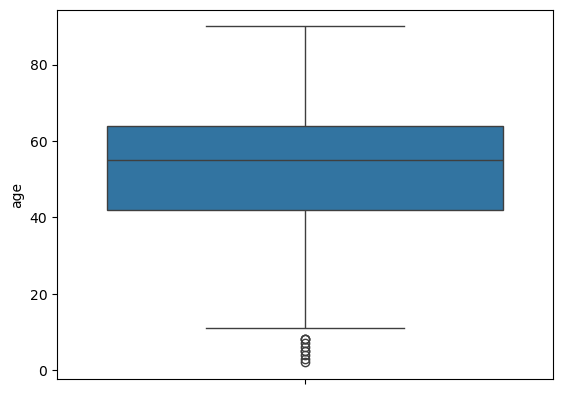

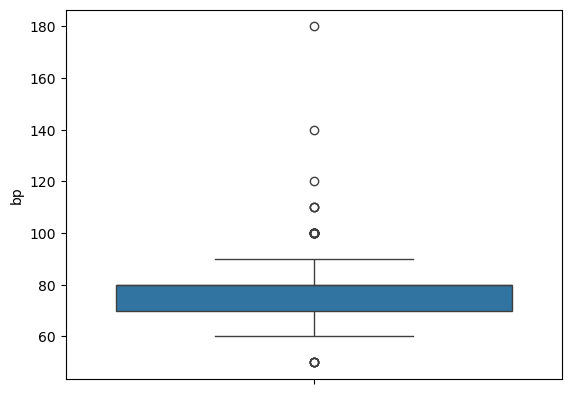

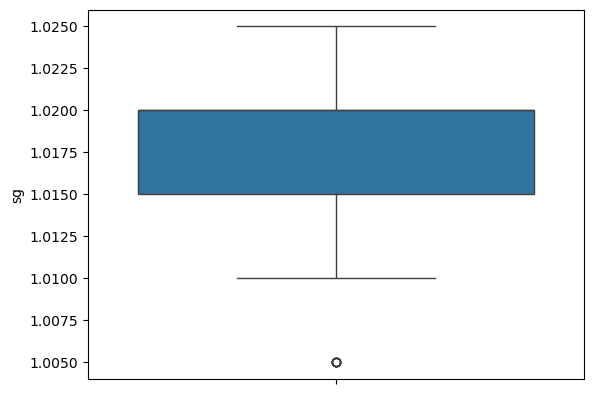

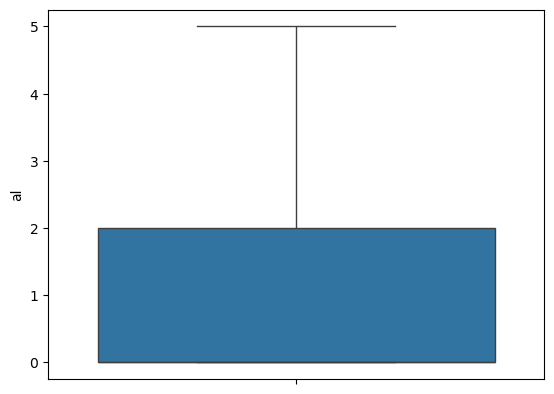

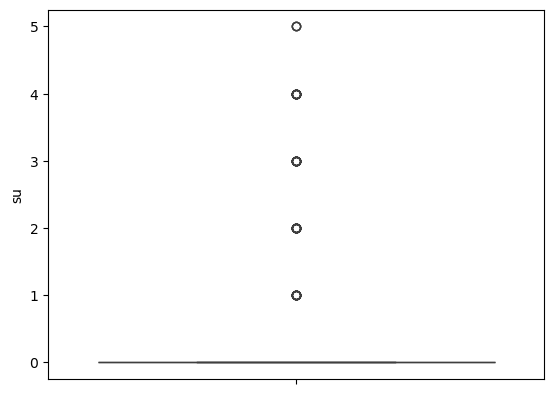

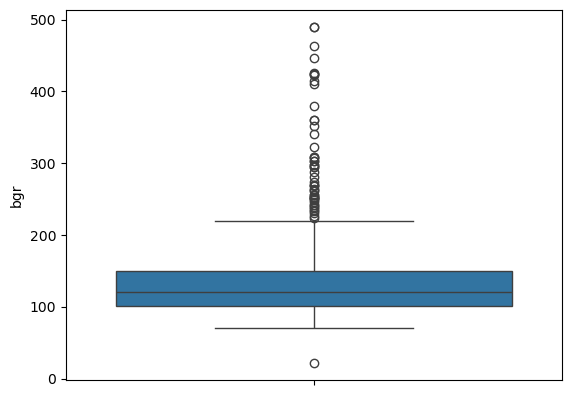

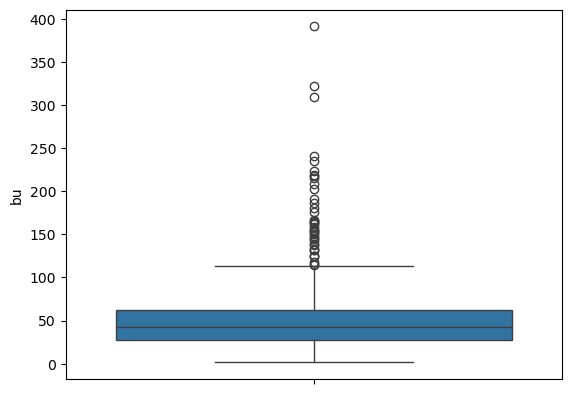

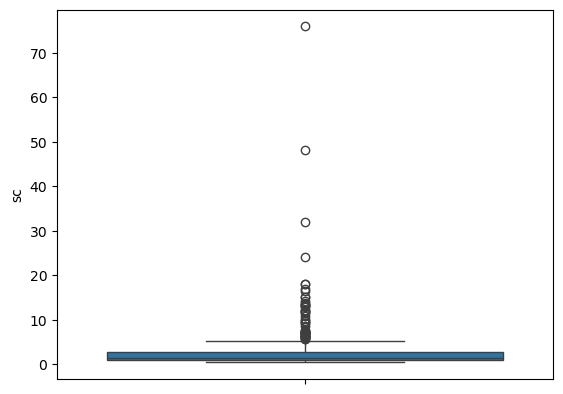

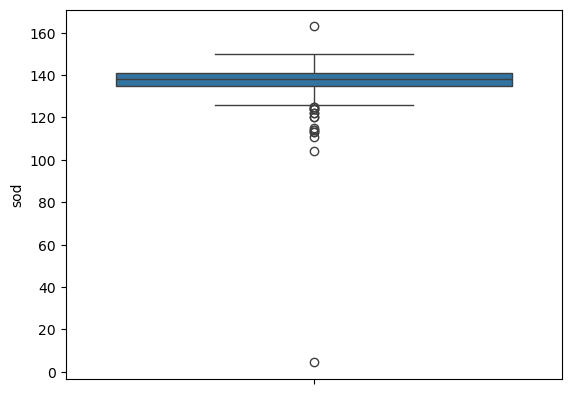

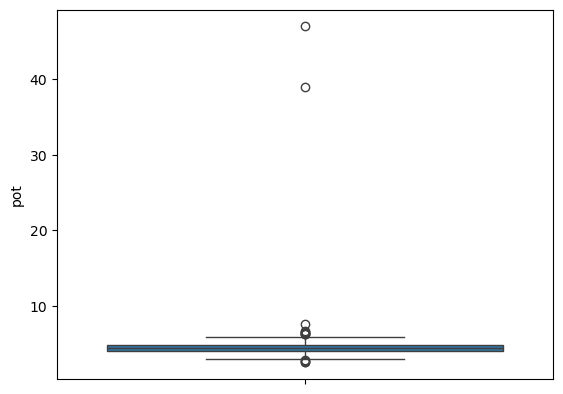

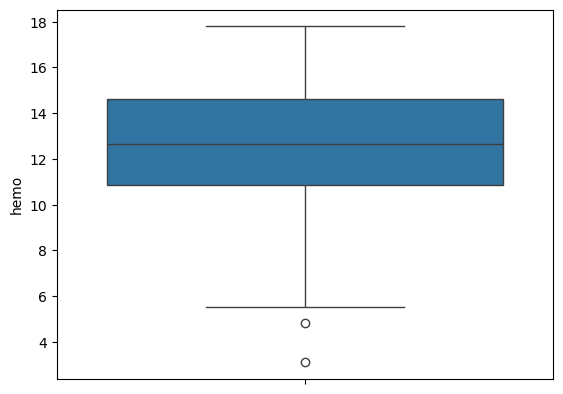

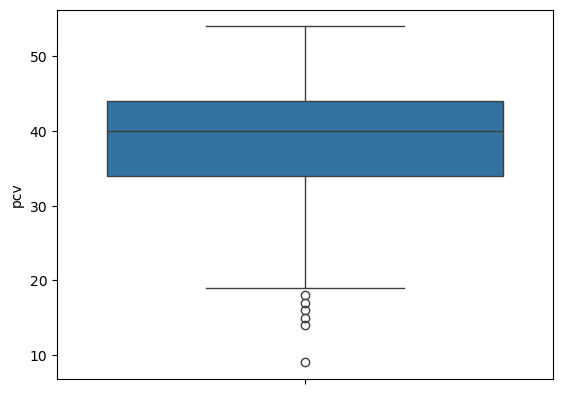

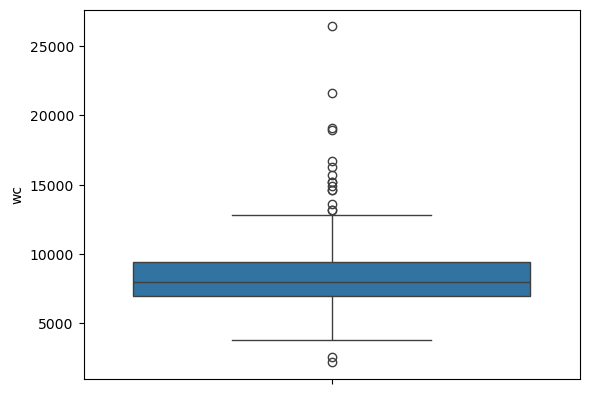

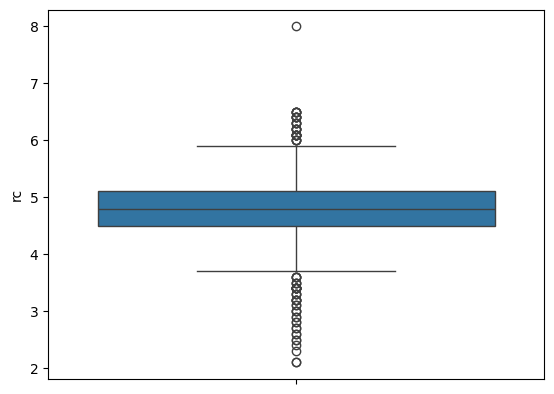

In [345]:
for i in df_imp2.columns:
    sns.boxplot(df_imp2[i])
    plt.show()

In [359]:
#merging the 2 tables - adding common col 
df_imp2['test']='test'
df_imp1['test']='test'
final_tab=pd.merge(df_imp1,df_imp2,on='test', how='')
final_tab #--- cross join happening - use another method

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,...,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,...,0.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2
1,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,...,0.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,4.8
2,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,...,3.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.8
3,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,...,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,...,0.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159995,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9
159996,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2
159997,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4
159998,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9


In [367]:
fin_df=pd.concat([df_imp1,df_imp2], axis=1)
fin_df.columns
#test x longer req
fin_df.drop('test', axis=1, inplace=True)

In [414]:
#sep dependnt and independent var
x=fin_df.drop('classification', axis=1)
y=fin_df['classification']
#classifying columns for encoding
bin_col=[]
for cols in x.columns:
    if x[cols].dtype =='object':
        if x[cols].nunique()< 3:
            bin_col.append(cols)

bin_col #---> since very less variation in values, can be encoded using either OHE or labelencoder

['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

In [438]:
#encoding
df1=pd.get_dummies(df[bin_col],drop_first=True,dtype=int)
y=y.apply(lambda x: 1 if x=='ckd' else 0 )

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,...,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,1,1,0,0,1,1,0,0,0,0,...,0.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2
1,1,1,0,0,0,0,0,0,0,0,...,0.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,4.8
2,1,1,0,0,0,1,0,1,0,1,...,3.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.8
3,1,0,1,0,1,0,0,1,1,1,...,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,1,1,0,0,0,0,0,0,0,0,...,0.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1,1,0,0,0,0,0,0,0,0,...,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9
396,1,1,0,0,0,0,0,0,0,0,...,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2
397,1,1,0,0,0,0,0,0,0,0,...,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4
398,1,1,0,0,0,0,0,0,0,0,...,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9


In [446]:
df1=pd.concat([df1,x.drop(columns=bin_col)],axis=1)

In [468]:
#split train test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df1,y, test_size=0.2,random_state=42,stratify=y)

# Building ML Model(traditional algorithm)

In [484]:
#importing all the models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

#evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [586]:
#Logistic Regression
logreg=LogisticRegression(solver='saga', max_iter=600)
logreg=logreg.fit(x_train, y_train)
y_pred_lg=logreg.predict(x_test)
accuracy_lg = accuracy_score(y_test, y_pred_lg)

#Decision Tree
dtree=DecisionTreeClassifier()
dtree=dtree.fit(x_train, y_train)
y_pred_dt=dtree.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

#Random Forest 
rforest=RandomForestClassifier()
rforest=rforest.fit(x_train, y_train)
y_pred_rf=rforest.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# XGBoost
xgboost=XGBClassifier()
xgboost=xgboost.fit(x_train, y_train)
y_pred_xgb=xgboost.predict(x_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

#KNN
knn=KNeighborsClassifier()
knn=knn.fit(x_train, y_train)
y_pred_knn=knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

#SVM
svc=SVC()
svc=svc.fit(x_train, y_train)
y_pred_svc=svc.predict(x_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

#Naive Bayes theorum
nbt=GaussianNB()
nbt=nbt.fit(x_train, y_train)
y_pred_nbt=nbt.predict(x_test)
accuracy_nbt = accuracy_score(y_test, y_pred_nbt)


#Voting classifier
mod_ens=VotingClassifier(estimators=[('logreg',logreg),('dtree',dtree),('rforest',rforest),('xgboost',xgboost),('knn',knn),('svc',svc),('nbt',nbt)])
mod_ens=mod_ens.fit(x_train,y_train)
pred_ens_test=mod_ens.predict(x_test)
accuracy_vot=accuracy_score(y_test,y_pred_ens)

C:\Users\itiss\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\itiss\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [588]:
models=['logreg','dtree','rforest','xgboost','knn','svc','nbt','voting']
accuracies=[accuracy_lg,accuracy_dt,accuracy_rf,accuracy_xgb,accuracy_knn,accuracy_svc,accuracy_nbt,accuracy_vot]

In [668]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [590]:
df_mod_acc=pd.DataFrame({'model':models, 'accuracy':accuracies})


In [592]:
df_mod_acc

,model,accuracy
0,logreg,0.6250
1,dtree,0.9750
2,rforest,1.0000
3,xgboost,0.9875
4,knn,0.6750
5,svc,0.6250
6,nbt,0.9750
7,voting,0.9875


In [606]:
#checking over_fitting/under fitting problem
pred_ens_train=mod_ens.predict(x_train)
accuracy_vot_train=accuracy_score(y_train, pred_ens_train)
print(f'accuracy for training data:{accuracy_vot_train}', f'accuracy for test data: {accuracy_vot}', sep='\n')

accuracy for training data:1.0
accuracy for test data: 0.9875


In [616]:
class_rep_vot = classification_report(y_test, pred_ens_test)
print(class_rep_vot)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [672]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.98      0.99        50

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [618]:
accuracy_vot

0.9875

In [640]:
cleaned_data=pd.concat([df1,y], axis=1)

In [664]:
df1.columns

Index(['rbc_normal', 'pc_normal', 'pcc_present', 'ba_present', 'htn_yes',
       'dm_yes', 'cad_yes', 'appet_poor', 'pe_yes', 'ane_yes', 'age', 'bp',
       'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc',
       'rc'],
      dtype='object')

In [644]:
cleaned_data.to_csv("cleaned_data.csv")  #cleaned data saved in system